In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.array([3,6,4,2,7])
y = np.array([0,1,0,0,1])

In [9]:
def compute_cost (x, y, w, b):
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        z = w * x[i] + b
        f_wb =  1 / (1 + np.exp(-z))
        cost+= - y[i] * np.log(f_wb) - (1 - y[i]) * np.log ( 1 - f_wb)

    total_cost = cost /  m
    return total_cost

In [12]:
def compute_gradient (x, y, w, b):

    m = x.shape[0]
    dj_dws = 0
    dj_dbs = 0
    for i in range(m):
        z = w * x[i] + b
        f_wb_i = 1 / ( 1 + np.exp(-z))
        dj_dw_i = (f_wb_i - y[i]) * x[i]
        dj_db_i = f_wb_i - y[i]

        dj_dws += dj_dw_i
        dj_dbs += dj_db_i

    dj_dw = dj_dws / m
    dj_db = dj_dbs / m

    return dj_dw, dj_db


In [13]:
def gradient_descent (x, y, w_in, b_in, iters, alpha, compute_cost, compute_gradient):
    
    m = x.shape[0]
    w = w_in
    b = b_in
    cost_history = []
    for i in range(iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 100 == 0:
            cost= compute_cost(x, y, w, b)
            cost_history.append(cost)
            print(f'w : {w} -- b :{b}') 

    return w, b, cost_history

    

In [51]:
iters = 1000
alpha = 0.8
w_in = 0 
b_in = 0

final_w, final_b , cost_hist = gradient_descent(x, y, w_in, b_in, iters ,alpha, compute_cost, compute_gradient)

print(final_w, final_b)


w : 0.32000000000000006 -- b :-0.08000000000000002
w : 1.4079776103880948 -- b :-6.766670497117449
w : 1.7428202638530375 -- b :-8.46104503835309
w : 1.9781973248126112 -- b :-9.647980692129147
w : 2.1617192422258094 -- b :-10.572588755564349
w : 2.3130403700798836 -- b :-11.334361897485222
w : 2.442225193398604 -- b :-11.98426727559725
w : 2.5551697360201646 -- b :-12.552157040700306
w : 2.6556470498547373 -- b :-13.057126500246499
w : 2.746227862349603 -- b :-13.512179452590116
2.827957755847263 -13.922629365259095


In [64]:
m = x.shape[0]
y_hat = []
for i in range(m):
    z = final_w * x[i] + final_b
    f_wb  = 1 / (1 + np.exp(-z))
    y_hat.append(f_wb)
print(y_hat)

[np.float64(0.004326088168974973), np.float64(0.9545712520627679), np.float64(0.06844668252120023), np.float64(0.00025686221409290015), np.float64(0.9971936909931256)]


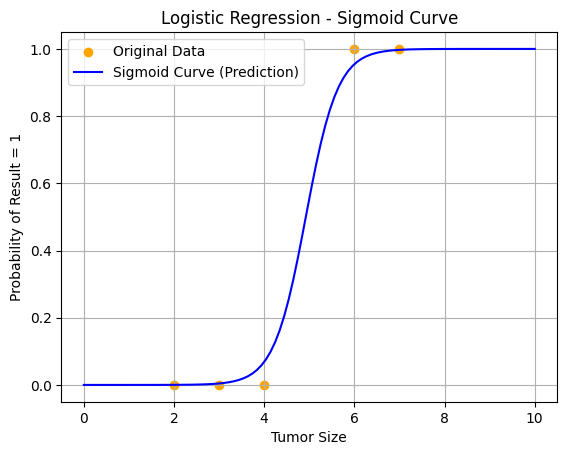

In [65]:
x_range = np.linspace(0, 10, 100)

z = final_w * x_range + final_b
f_wb = 1 / (1 + np.exp(-z))  

plt.scatter(x, y, color='orange', label='Original Data')
plt.plot(x_range, f_wb, color='blue', label='Sigmoid Curve (Prediction)')
plt.xlabel('Tumor Size')
plt.ylabel('Probability of Result = 1')
plt.title('Logistic Regression - Sigmoid Curve')
plt.grid(True)
plt.legend()
plt.show()